## Tutorial on Automated Machine Learning using MLBox

In [ ]:
!pip install mlbox

In [2]:
import mlbox

ModuleNotFoundError: No module named 'mlbox'

In [3]:
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *

ModuleNotFoundError: No module named 'mlbox'

In [60]:
target_name='SalePrice'
rd=Reader(sep=",")
df=rd.train_test_split(['/content/train.csv','/content/test.csv'],target_name)


reading csv : train.csv ...
cleaning data ...
CPU time: 0.32579898834228516 seconds

reading csv : test.csv ...
cleaning data ...
CPU time: 0.31247496604919434 seconds

> Number of common features : 80

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> Number of categorical features: 43
> Number of numerical features: 37
> Number of training samples : 1460
> Number of test samples : 1459

> Top sparse features (% missing values on train set):
PoolQC         99.5
MiscFeature    96.3
Alley          93.8
Fence          80.8
FireplaceQu    47.3
dtype: float64

> Task : regression
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [61]:
df

{'target': 0       208500.0
 1       181500.0
 2       223500.0
 3       140000.0
 4       250000.0
           ...   
 1455    175000.0
 1456    210000.0
 1457    266500.0
 1458    142125.0
 1459    147500.0
 Name: SalePrice, Length: 1460, dtype: float64,
 'test':       1stFlrSF  2ndFlrSF  3SsnPorch  ... YearBuilt  YearRemodAdd  YrSold
 0        896.0       0.0        0.0  ...    1961.0        1961.0  2010.0
 1       1329.0       0.0        0.0  ...    1958.0        1958.0  2010.0
 2        928.0     701.0        0.0  ...    1997.0        1998.0  2010.0
 3        926.0     678.0        0.0  ...    1998.0        1998.0  2010.0
 4       1280.0       0.0        0.0  ...    1992.0        1992.0  2010.0
 ...        ...       ...        ...  ...       ...           ...     ...
 1454     546.0     546.0        0.0  ...    1970.0        1970.0  2006.0
 1455     546.0     546.0        0.0  ...    1970.0        1970.0  2006.0
 1456    1224.0       0.0        0.0  ...    1960.0        1996.0  200

In [62]:
type(df)

dict

In [63]:
dft = Drift_thresholder()
df = dft.fit_transform(df)   #removing non-stable features (like ID,...)


computing drifts ...
CPU time: 0.9834675788879395 seconds

> Top 10 drifts

('Id', 1.0)
('MSSubClass', 0.06892935000428602)
('MoSold', 0.04920427245284942)
('TotalBsmtSF', 0.04812977545284336)
('BsmtExposure', 0.046784259638940284)
('OverallQual', 0.0413787346766572)
('GarageYrBlt', 0.04040118887748578)
('LotFrontage', 0.03773536034035874)
('WoodDeckSF', 0.037317531142201155)
('HeatingQC', 0.035716149000692754)

> Deleted variables : ['Id']
> Drift coefficients dumped into directory : save


In [64]:
space = {
    
        'est__strategy':{"search":"choice",
                                  "space":["LightGBM"]},    
        'est__n_estimators':{"search":"choice",
                                  "space":[50,100, 150]},    
        'est__colsample_bytree':{"search":"uniform",
                                  "space":[0.8,0.95]},
        'est__subsample':{"search":"uniform",
                                  "space":[0.6,0.95]},
        'est__max_depth':{"search":"choice",
                                  "space":[5,6,7,8,9,10]},
        'est__learning_rate':{"search":"uniform",
                                  "space":[0.01, 0.10]} 
    
        }
params = Optimiser().optimise(space, df,20)

##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8101384496270526, 'learning_rate': 0.010153063728558783, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.8039327237850827, 'boosting_type': 'gbdt', 'class_weight': None, 'importance_type': 'split', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:74: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")


MEAN SCORE : neg_mean_squared_error = -1370858950.5675316
VARIANCE : 18895194.78826368 (fold 1 = -1351963755.7792678, fold 2 = -1389754145.3557951)
CPU time: 0.709587812423706 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.9465908643838494, 'learning_rate': 0.0943715679314403, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.7837754626946176, 'boosting_type': 'gbdt', 'class_weight': None, 'importance_type': 'split', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
MEAN SCORE : n

In [65]:
# BEST HYPER-PARAMETERS
# {'est__colsample_bytree': 0.888448620550488, 'est__learning_rate': 0.07, 
# 'est__max_depth': 9, 'est__n_estimators': 150, 
# 'est__strategy': 'LightGBM', 'est__subsample': 0.9236160644538745}

In [66]:
params

{'est__colsample_bytree': 0.8902168898133273,
 'est__learning_rate': 0.076180849701738,
 'est__max_depth': 6,
 'est__n_estimators': 100,
 'est__strategy': 'LightGBM',
 'est__subsample': 0.63052646674535}


fitting the pipeline ...
CPU time: 0.24222183227539062 seconds


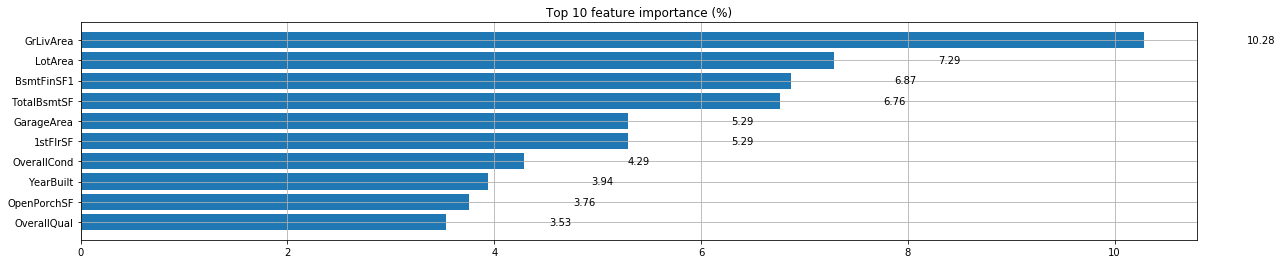


> Feature importances dumped into directory : save

predicting...
CPU time: 0.08385396003723145 seconds

> Overview on predictions : 

   SalePrice_predicted
0        127432.385034
1        154360.141018
2        176617.333763
3        183947.658495
4        191623.308236
5        172049.635344
6        169343.560905
7        167698.690321
8        183900.601198
9        122360.533002

dumping predictions into directory : save ...


In [67]:
prd = Predictor()
prd.fit_predict(params,df)